In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2019-12-31'

# scraping data from yahoo finance
df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544686
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482607


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.938202
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.325790
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.298737
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.721893
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.245941


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544686
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482607


In [5]:
# removing the date and adj close columns
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


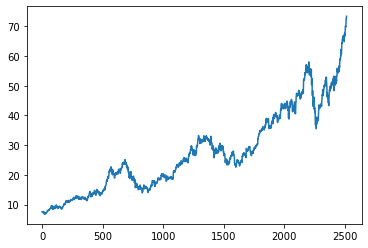

In [6]:
# plotting closing price
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0
...,...,...,...,...,...
2511,71.222504,70.730003,71.172501,71.067497,48478800.0
2512,72.495003,71.175003,71.205002,72.477501,93121200.0
2513,73.492500,72.029999,72.779999,72.449997,146266000.0
2514,73.172501,71.305000,72.364998,72.879997,144114400.0


In [8]:
# mean of first 100days
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
2515    60.331875
Name: Close, Length: 2516, dtype: float64

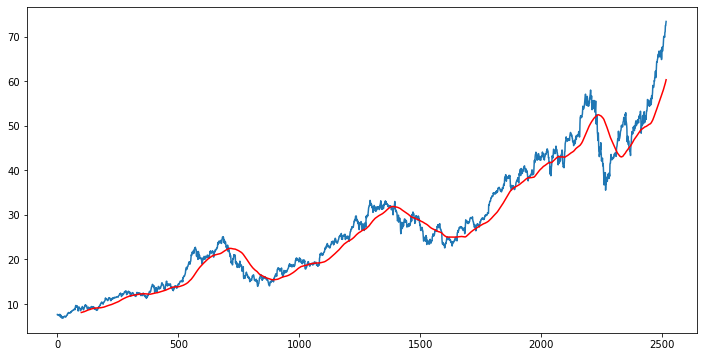

In [9]:
# plotting 100ma
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
# mean of the first 200 days
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
2515    54.793137
Name: Close, Length: 2516, dtype: float64

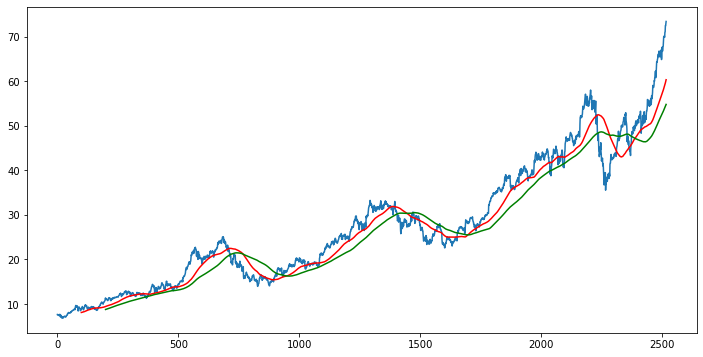

In [11]:
# plotting 100ma and 200ma
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
# number of rows and rows and columns in dataset
df.shape

(2516, 5)

In [13]:
# Data is split into 70% training and 30% testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [14]:
data_training.head() 

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [15]:
data_testing.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [16]:
#scale down the training data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [17]:
#convert into array
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.85089656],
       [0.84616011],
       [0.84587593]])

In [18]:
data_training_array.shape

(1761, 1)

In [19]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(1661, 100, 1)

In [21]:
# ML MODEl
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [22]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 17s 239ms/step - loss: 0.0725
Epoch 2/50
52/52 [==============================] - 12s 235ms/step - loss: 0.0133
Epoch 3/50
52/52 [==============================] - 12s 228ms/step - loss: 0.0106
Epoch 4/50
52/52 [==============================] - 12s 236ms/step - loss: 0.0101
Epoch 5/50
52/52 [==============================] - 13s 251ms/step - loss: 0.0102
Epoch 6/50
52/52 [==============================] - 12s 233ms/step - loss: 0.0097
Epoch 7/50
52/52 [==============================] - 12s 229ms/step - loss: 0.0094
Epoch 8/50
52/52 [==============================] - 12s 236ms/step - loss: 0.0095
Epoch 9/50
52/52 [==============================] - 12s 227ms/step - loss: 0.0086
Epoch 10/50
52/52 [==============================] - 13s 252ms/step - loss: 0.0087
Epoch 11/50
52/52 [==============================] - 12s 232ms/step - loss: 0.0076
Epoch 12/50
52/52 [==============================] - 12s 227ms/step - loss: 0.0076
Epoch 13/50
5

In [25]:
model.save('keras_model.h5')

In [26]:
data_testing.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [27]:
data_training.tail(100)

,Close
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
1665,27.370001
...,...
1756,29.072500
1757,29.129999
1758,29.315001
1759,29.190001


In [28]:
past_100_days = data_training.tail(100)

In [29]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [30]:
final_df.head()

,Close
0,27.202499
1,27.000000
2,26.982500
3,27.045000
4,27.370001


In [31]:
# scale down rows between 0 - 1
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.07269581],
       [0.076

In [32]:
input_data.shape

(855, 1)

In [33]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [34]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [35]:
# Making Predictions

y_predicted = model.predict(x_test)

y_predicted.shape

(755, 1)

In [36]:
y_test

array([0.06660719, 0.06833931, 0.06765694, 0.07075375, 0.07757719,
       0.08324586, 0.08387573, 0.08723495, 0.08461056, 0.08350831,
       0.08854715, 0.08849465, 0.08739241, 0.08854715, 0.08896706,
       0.08838969, 0.09841487, 0.09872982, 0.09878228, 0.09710267,
       0.09563301, 0.13447409, 0.13331935, 0.1362062 , 0.14255719,
       0.14906573, 0.15174258, 0.15373715, 0.15216249, 0.15830357,
       0.16738404, 0.1699559 , 0.16911615, 0.17105818, 0.17620198,
       0.178354  , 0.17530969, 0.17599206, 0.17740917, 0.17772417,
       0.19242073, 0.1880643 , 0.19236827, 0.19005879, 0.19100361,
       0.18827421, 0.18659456, 0.18900904, 0.18932396, 0.18822176,
       0.19593749, 0.19714469, 0.19347055, 0.20118628, 0.19268318,
       0.20097628, 0.19835189, 0.19688223, 0.19814197, 0.21346844,
       0.21514801, 0.21415073, 0.21273361, 0.21294353, 0.21855977,
       0.21462318, 0.21273361, 0.21105396, 0.21016167, 0.20207857,
       0.20297085, 0.19903426, 0.20312831, 0.19982154, 0.19709

In [37]:
y_predicted

array([[0.13413712],
       [0.13498172],
       [0.13561788],
       [0.13602555],
       [0.13620737],
       [0.13620132],
       [0.13607924],
       [0.13592409],
       [0.13581355],
       [0.13580702],
       [0.13593063],
       [0.1361954 ],
       [0.13660523],
       [0.1371451 ],
       [0.13778755],
       [0.13850074],
       [0.13924876],
       [0.14001516],
       [0.14080667],
       [0.1416262 ],
       [0.14246649],
       [0.1433065 ],
       [0.1442098 ],
       [0.1453094 ],
       [0.14671414],
       [0.14851594],
       [0.15077782],
       [0.15343495],
       [0.15644324],
       [0.15975758],
       [0.16327675],
       [0.16691795],
       [0.17065686],
       [0.17439556],
       [0.17805171],
       [0.18162711],
       [0.18511643],
       [0.188501  ],
       [0.1917538 ],
       [0.19484772],
       [0.19775443],
       [0.20045426],
       [0.20296748],
       [0.20531383],
       [0.2075063 ],
       [0.2095524 ],
       [0.21145113],
       [0.213

In [38]:
scaler.scale_

array([0.02099517])

In [39]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

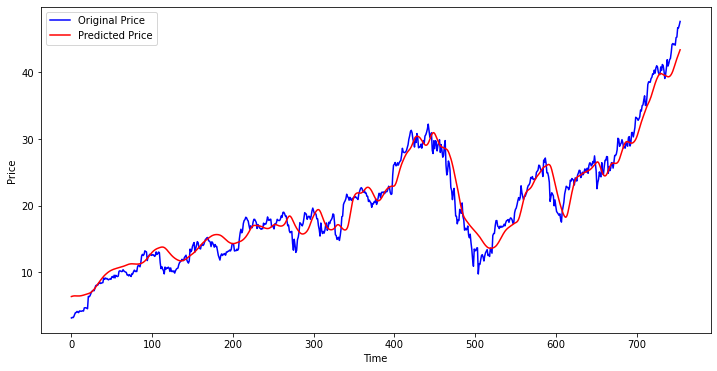

In [40]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()